<a href="https://colab.research.google.com/github/3333210089/Arya-Rizaldi-Wijaya_3333210089/blob/main/Forcasting_Hyundai_Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deret Waktu**

Deret waktu adalah rangkaian titik data yang diindeks dalam urutan waktu dan digunakan untuk memprediksi masa depan berdasarkan nilai yang diamati sebelumnya. Deret waktu sangat sering diplot melalui diagram garis. Deret waktu digunakan dalam statistik, prakiraan cuaca, prediksi harga saham, pengenalan pola, prediksi gempa bumi, dll.

Analisis deret waktu terdiri dari metode untuk menganalisis data deret waktu untuk mengekstraksi statistik yang bermakna dan karakteristik data lainnya.

Peramalan deret waktu adalah penggunaan model untuk memprediksi nilai masa depan berdasarkan nilai yang diamati sebelumnya

**About** **Dataset**



**Hyundai Motor Company Stock Historical Price**

Harga Historis Saham Perusahaan Motor Hyundai mengacu pada data historis
mengenai pergerakan harga saham Hyundai Motor Company. Perusahaan Motor Hyundai adalah produsen otomotif multinasional asal Korea Selatan.
Data historis harga saham Hyundai Motor Company mencakup informasi tentang harga pembukaan, penutupan, tertinggi, dan terendah saham Hyundai pada berbagai hari perdagangan di masa lalu.
Menganalisis data historis harga saham dapat memberikan wawasan berharga bagi investor dan analis. Ini membantu mereka memahami bagaimana kinerja saham tersebut dari waktu ke waktu, mengidentifikasi tren, dan membuat keputusan yang berdasarkan informasi untuk membeli atau menjual saham Hyundai Motor Company. Data harga historis biasanya disajikan dalam bentuk grafik atau tabel, memungkinkan pengguna untuk memvisualisasikan kinerja saham dan melacak volatilitas, pertumbuhan, atau penurunan harga saham dalam berbagai periode waktu.


**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/gunhee/amdgoogle?select=GOOGL.csv

In [ ]:
# https://drive.google.com/file/d/1LcVxOmGVp7d0b-eeArxfw56QN9_ZHvUQ/view?usp=sharing

!gdown 1LcVxOmGVp7d0b-eeArxfw56QN9_ZHvUQ

Downloading...
From: https://drive.google.com/uc?id=1LcVxOmGVp7d0b-eeArxfw56QN9_ZHvUQ
To: /content/005380.KS.csv
100% 123k/123k [00:00<00:00, 115MB/s]


Masukan data yang akan dilakukan forecasting dimana pd.read_csv('005380.KS.csv'), modul pandas (pd) digunakan untuk memanggil fungsi read_csv(), yang membaca file CSV dan mengonversinya menjadi sebuah DataFrame. Argumen yang diberikan kepada fungsi ini adalah nama file CSV yang ingin dibaca, yaitu '005380.KS.csv'.

In [ ]:
train_data = pd.read_csv('005380.KS.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,117625.117188,445332
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,117216.671875,530496
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,114357.742188,769406
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,112315.648438,586187
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,111498.789062,888701


Check missing values Dalam dataset yang diberikan, kita perlu memeriksa apakah terdapat nilai yang hilang atau tidak lengkap.Nilai yang hilang dapat mempengaruhi analisis dan model yang kita buat.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835 entries, 0 to 1834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1835 non-null   object 
 1   Open       1835 non-null   float64
 2   High       1835 non-null   float64
 3   Low        1835 non-null   float64
 4   Close      1835 non-null   float64
 5   Adj Close  1835 non-null   float64
 6   Volume     1835 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.5+ KB


Periksa nilai statistik untuk setiap fitur dan Untuk melihat statistik nilai untuk setiap fitur pada dataset, kita dapat menggunakan metode .describe() pada DataFrame. Metode ini akan memberikan ringkasan statistik seperti count (jumlah entri), mean (rata-rata), std (standar deviasi), min (nilai minimum), quartiles (kuartil 25%, 50%, 75%), dan max (nilai maksimum) untuk setiap kolom numerik dalam dataset.

In [ ]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1.835000e+03
mean,157902.833787,159938.147139,155907.029973,157894.822888,142888.291689,8.651983e+05
std,36667.260849,37043.929017,36171.115796,36528.245602,38607.593139,9.792197e+05
min,67200.000000,71000.000000,65000.000000,65900.000000,60645.710938,0.000000e+00
25%,131000.000000,132750.000000,129500.000000,131000.000000,112665.304688,4.277215e+05
50%,151000.000000,152500.000000,149500.000000,151000.000000,127668.734375,5.952190e+05
75%,181000.000000,183500.000000,178500.000000,180750.000000,174147.281250,9.194790e+05
max,271000.000000,289000.000000,259500.000000,267500.000000,250131.734375,1.993370e+07


Tangani data waktu tanggal untuk deret waktu selanjutnya  mengubah kolom 'Date' menjadi tipe data datetime menggunakan pd.to_datetime() dan mengaturnya sebagai indeks DataFrame menggunakan .set_index(). Selanjutnya, mencetak lima baris pertama dari data dengan train_data.head() untuk memastikan perubahan tersebut.dan melanjutkan dengan analisis deret waktu atau manipulasi data lainnya yang sesuai dengan kebutuhan.

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,147500.0,148000.0,143500.0,144000.0,117625.117188,445332
2016-01-05,143000.0,145000.0,142000.0,143500.0,117216.671875,530496
2016-01-06,144000.0,145000.0,139000.0,140000.0,114357.742188,769406
2016-01-07,138500.0,140000.0,137500.0,137500.0,112315.648438,586187
2016-01-08,134500.0,138000.0,133500.0,136500.0,111498.789062,888701


**EXPLORATORY DATA ANALYSIS**

Sekarang mari kita visualisasikan Adjusted Close (Harga Saham saat pasar tutup) untuk membuat dan menampilkan plot dari kolom 'Adj Close' dalam DataFrame . digunakan untuk mengatur ukuran plot dengan lebar 11 dan tinggi 8. Kemudian, 'Adj Close'.plot menghasilkan plot garis untuk kolom 'Adj Close' dari DataFrame

Selanjutnya, plt.title('Close') menambahkan judul plot dengan teks 'Close',
plt.xlabel('Date') memberikan label 'Date' untuk sumbu x. dan plt.ylabel('Close') memberikan label 'Close' untuk sumbu y.

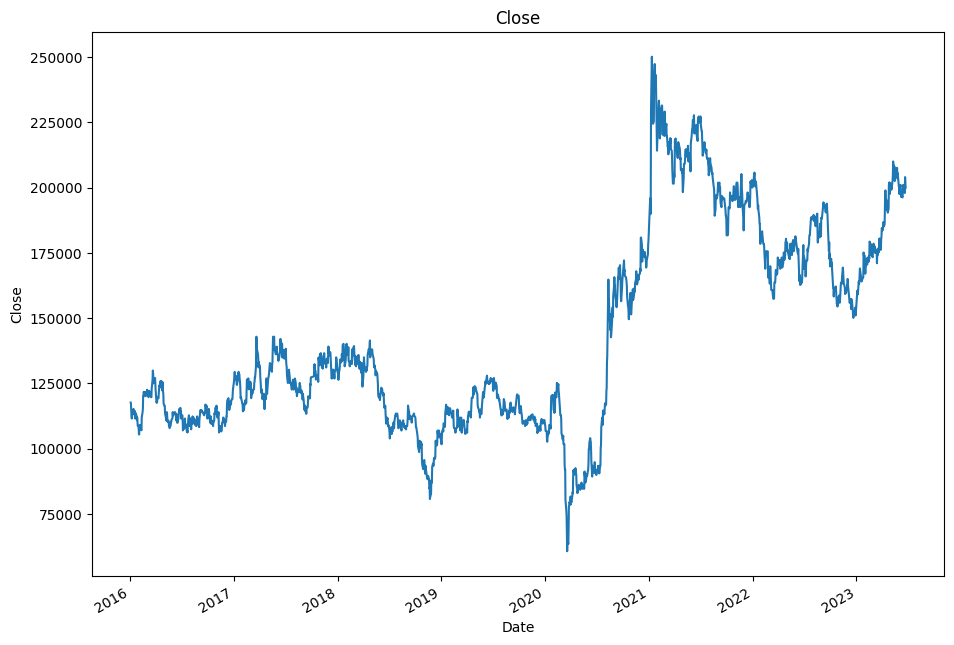

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Close') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Close') # y label
plt.show()

selanjunya kita akan menampilkan matplotlib.pyplot untuk membuat dan menampilkan subplot dari beberapa kolom dalam DataFrame train_data. Fungsi plt.figure(figsize=(16, 8)) digunakan untuk mengatur ukuran plot dengan lebar 16 dan tinggi 8.

Variabel cols berisi daftar kolom yang ingin ditampilkan dalam subplot. Dalam kasus ini, kolom 'Open', 'Close', 'Volume', 'High', dan 'Low' dipilih untuk ditampilkan.

Selanjutnya, train_data[cols].plot(figsize=(11, 9), subplots=True) digunakan untuk membuat subplot dari kolom-kolom yang dipilih dalam DataFrame train_data. Argumen figsize=(11, 9) digunakan untuk mengatur ukuran subplot dengan lebar 11 dan tinggi 9.

Terakhir, plt.show() digunakan untuk menampilkan subplot yang telah dibuat.

<Figure size 1600x800 with 0 Axes>

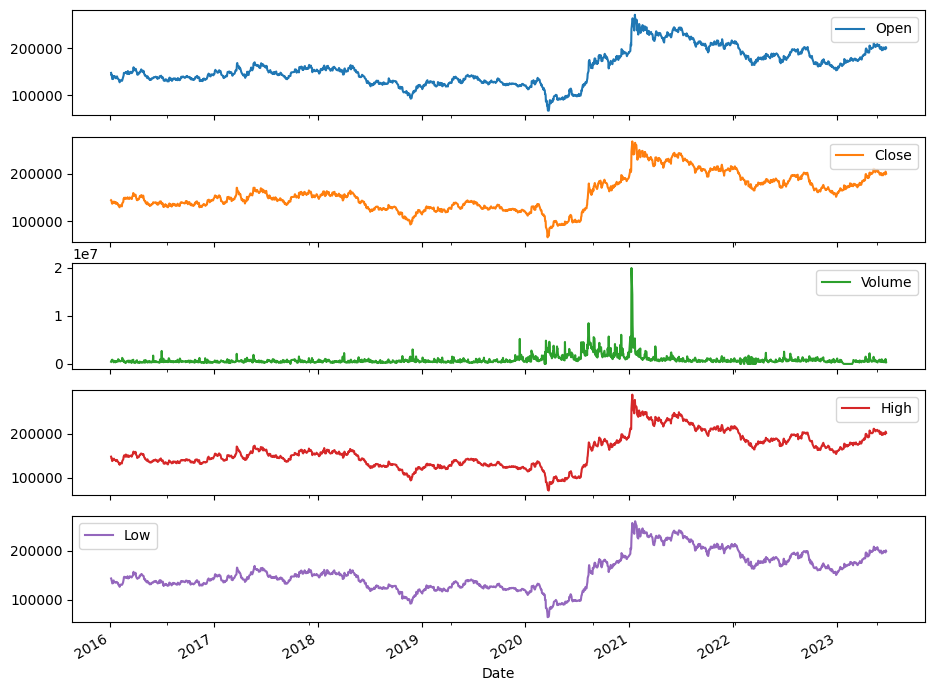

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

selanjutnya kita akan menghitung persentase perubahan antara harga tertinggi (High) dan harga terendah (Low) dalam satu hari perdagangan dan menghitung selisih antara harga penutupan dan harga pembukaan, kemudian membaginya dengan harga pembukaan, dan mengalikan dengan 100 untuk mendapatkan persentase perubahan.

In [ ]:
train_data['HL'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['CO'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Membuat DataFrame baru yang hanya berisi kolom 'HL', 'CO', 'Adj Close', dan 'Volume' dari DataFrame train_data. DataFrame baru ini disimpan dalam variabel df dan akan berisi data dari kolom-kolom tersebut.

In [ ]:
df = train_data[['HL', 'CO', 'Adj Close','Volume']]

forecast_out = int(math.ceil(0.05 * len(df))): Langkah ini menghitung jumlah baris yang akan digeser maju berdasarkan persentase tertentu dari keseluruhan dataset. Dalam kasus ini, persentasenya adalah 0.05 (atau 5%). Fungsi len(df) menghitung jumlah baris dalam DataFrame df, dan math.ceil() digunakan untuk membulatkan hasil ke bilangan bulat terdekat yang lebih besar. Hasilnya disimpan dalam variabel forecast_out.

print(forecast_out): Baris ini mencetak nilai dari forecast_out, yaitu jumlah baris yang akan digeser maju. Ini berguna untuk mengetahui berapa banyak baris yang akan digunakan untuk peramalan.

df['Tabel'] = df['Adj Close'].shift(-forecast_out): Pada baris ini, kolom baru bernama 'Tabel' dibuat dalam DataFrame df. Nilai-nilai dalam kolom 'Tabel' diisi dengan nilai-nilai dari kolom 'Adj Close' yang digeser maju sebanyak forecast_out baris ke atas. Ini berarti nilai-nilai dalam kolom 'Tabel' akan mewakili nilai-nilai 'Adj Close' di masa depan (forecast) sebanyak forecast_out periode waktu.

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['Label'] = df['Adj Close'].shift(-forecast_out)

92


<ipython-input-11-8b977b20b2d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['Adj Close'].shift(-forecast_out)


Dengan demikian DataFrame df akan memiliki kolom baru 'Label' yang berisi nilai-nilai 'Adj Close' yang digeser maju (shifted) sebanyak forecast_out periode waktu ke atas.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Jelas dari plot bahwa ada peningkatan tren secara keseluruhan, dengan beberapa musim di dalamnya.terdapat tren peningkatan secara keseluruhan dalam harga saham dari waktu ke waktu. Namun, juga terlihat adanya pola musiman atau fluktuasi periodik dalam harga, di mana harga saham mengalami periode naik dan turun. Pola musiman ini bisa disebabkan oleh berbagai faktor seperti kondisi pasar, peristiwa ekonomi, atau faktor-faktor khusus industri yang memengaruhi harga saham. Dengan mengidentifikasi pola dan tren ini, hal tersebut dapat membantu dalam membuat prediksi dan memahami perilaku harga saham di masa depan.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['Label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-13-7dd57b3faf16>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Label'], 1))


In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

X_Predictions adalah data yang akan di prediksi dan X adalah data yang akan di uji



In [ ]:
df.dropna(inplace=True)
y = np.array(df['Label'])

<ipython-input-15-e1436d1b16f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


df.dropna digunakan untuk menghapus baris yang mengandung nilai yang hilang (NaN) dari dataframe df. Operasi ini dilakukan secara in-place, yang berarti dataframe df akan diubah langsung.

y akan diinisialisasi sebagai array numpy yang berisi kolom 'label' dari dataframe df. Kolom 'Label' ini akan digunakan sebagai target variabel yang ingin diprediksi oleh model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X adalah matriks fitur yang akan digunakan untuk pelatihan dan pengujian.
y adalah larik target yang akan digunakan untuk pelatihan dan pengujian.

test_size=0.2 menentukan proporsi data yang akan dialokasikan untuk pengujian, dalam hal ini 20% dari data akan digunakan untuk pengujian sedangakan random_state=42 digunakan untuk mengatur generator angka acak agar menghasilkan hasil yang sama setiap kali kode dieksekusi. Hal ini memastikan bahwa pembagian data menjadi subset pelatihan dan pengujian akan konsisten setiap kali kode dijalankan.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

syntax  X_train (subset pelatihan fitur) dan y_train (subset pelatihan target).

Skor yang dihasilkan mencerminkan sejauh mana model mampu menjelaskan variasi dalam data pengujian. Skor ini disimpan dalam variabel lr_confidence

In [ ]:
lr_confidence

0.6572256360262845

nilai skor atau kepercayaan model Linear Regression terhadap data pengujian dari hasil yang didapatkan bahwasan yah kinerja model bagus karena Nilai skor dapat berada dalam rentang 0 hingga 1, di mana semakin dekat dengan 1, semakin baik kinerja model.

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [ ]:
rf_confidence

0.8653544725309961

Nilai skor ini juga mengindikasikan sejauh mana model **rf_confidence** dapat menjelaskan variasi dalam data pengujian.

-----
Selanjutnya melakukan prediksi menggunakan model Random Forest Regression (RF) dan mengisi kolom 'Forecast' dalam DataFrame df dengan nilai-nilai prediksi.

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-21-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-21-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

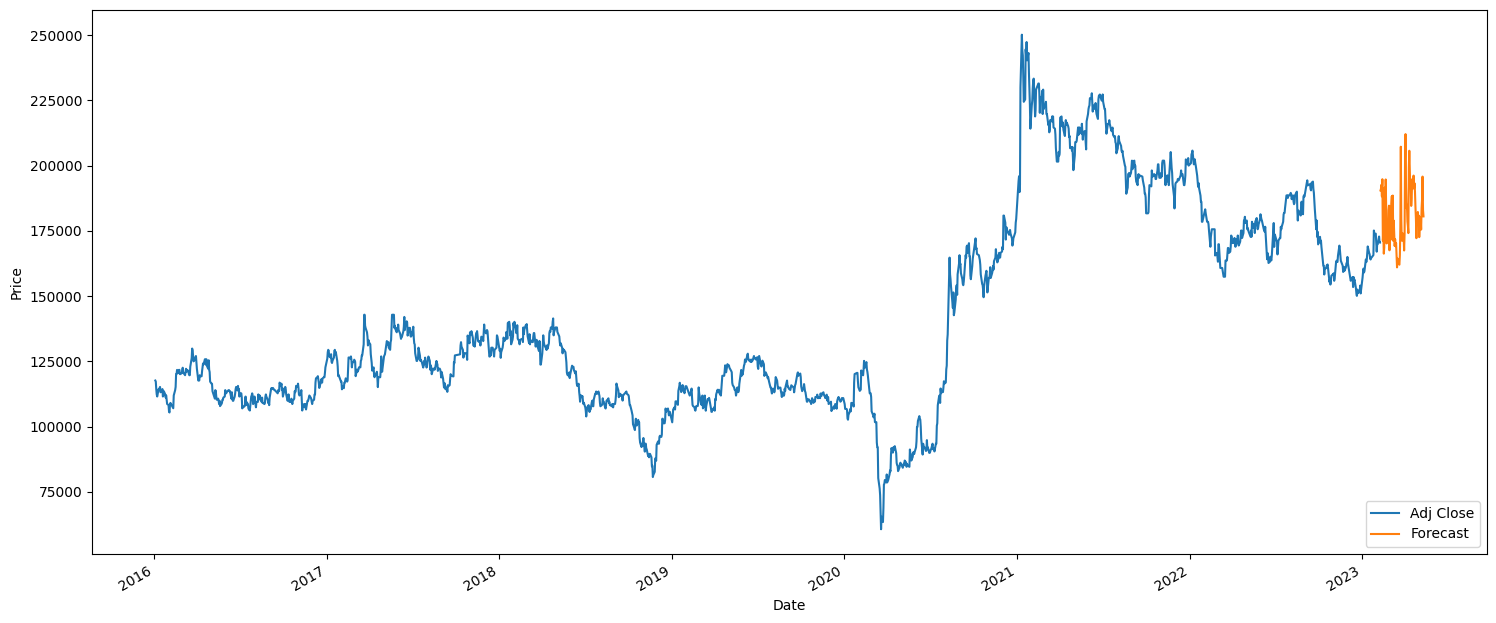

In [ ]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Berdasarkan plot yang ditampilkan, terlihat adanya tren naik dan turun pada harga penutupan yang disesuaikan ('Adj Close') dan prediksi ('Forecast'). Terdapat periode di mana harga penutupan aktual dan prediksi menunjukkan tren kenaikan yang stabil, menunjukkan potensi keuntungan bagi investor. kita bisa lihat untuk nilai saham pada hyundai motor company ini akan mengalami peningkatan pada tahun 2023 kedepannya hal ini menunjukan baik untuk para investor dan pemilik saham di hyundai motor